In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.linspace(0, 1, 20)
x_test = np.linspace(0, 1, 40)
y_train = (1 + 0.6 * np.sin (2 * np.pi * x_train / 0.7) + 0.3 * np.sin (2 * np.pi * x_train)) / 2
y_test = (1 + 0.6 * np.sin (2 * np.pi * x_test / 0.7) + 0.3 * np.sin (2 * np.pi * x_test)) / 2
print(x_train)
print(x_test)
print('\n')
print(y_train)
print(y_test)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[0.         0.02564103 0.05128205 0.07692308 0.1025641  0.12820513
 0.15384615 0.17948718 0.20512821 0.23076923 0.25641026 0.28205128
 0.30769231 0.33333333 0.35897436 0.38461538 0.41025641 0.43589744
 0.46153846 0.48717949 0.51282051 0.53846154 0.56410256 0.58974359
 0.61538462 0.64102564 0.66666667 0.69230769 0.71794872 0.74358974
 0.76923077 0.79487179 0.82051282 0.84615385 0.87179487 0.8974359
 0.92307692 0.94871795 0.97435897 1.        ]


[0.5        0.68521767 0.83525285 0.92204589 0.93028586 0.86036332
 0.72804695 0.56098021 0.39277126 0.25595466 0.17533173 0.16309785
 0.21676319 0.3202584  0.44792217 0.57044659 0.66144277 0.70317268
 0.69019692 0.63016512]
[0.5        0.59249973 0.68076705 0.76077602 0.82890323 0.88210341
 0.91805585 0.93527426 0.93317454 

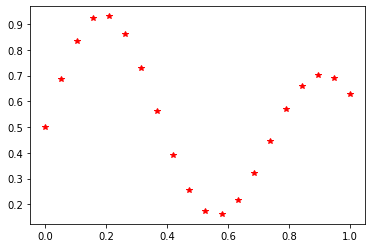

In [10]:
plt.plot(x_train, y_train, 'r*')

In [9]:
c = []
for i in range(len(y_train)):
    if i == 0:
        if y_train[i] > y_train[i+1]:
            c.append(x_train[i])
    elif i == len(y_train) - 1:
        if y_train[i] > y_train[i-1]:
            c.append(x_train[i])
    else:
        if y_train[i] > y_train[i-1] and y_train[i] > y_train[i+1]:
            c.append(x_train[i])

r = []
for element in c:
    r.append(0.5)

print(c)
print(r)

[0.21052631578947367, 0.894736842105263]
[0.5, 0.5]


In [17]:
class RBFN:
    """
    1 Hidden Layer RBFN Class
    
    Input:  x - 1 dimensional train data
            y - 1 dimensional true values
            neurons - number of neurons in layer
            lr - learning rate (default: 0.1)
            epochs - number of iterations (default: 1000)
    """
    def __init__(self, x, y, c, r, neurons, lr=0.1, epochs=1000):
        self.x = x
        self.y = y
        self.c = c
        self.r = r
        self.neurons = neurons
        self.w = self.initialization(self.neurons)
        self.b = self.initialization(1)
        self.fi = np.zeros(self.neurons)
        self.a = 0
        self.lr = lr
        self.epochs = epochs
        self.pred_y = []
    
    def initialization(self, size):
        return np.random.rand(size)
    
    def fi_calculation(self, x, c, r):
        return np.exp(-1 * ((x - c)**2 / (2 * r**2)))
    
    def forward_propagation(self, x, test=None):
        output_layer = 0
        for i in range(self.neurons):
            self.fi[i] = self.fi_calculation(x, self.c[i], self.r[i])
            output_layer += self.fi[i] * self.w[i]
        if test != None:
            self.pred_y.append(output_layer + self.b)
        else:
            self.a = output_layer + self.b
    
    def error_function(self, y_true, output_layer):
        return y_true - output_layer
    
    def params_ouput_update(self, e):
        for i in range(len(self.w)):
            self.w[i] = self.w[i] + self.lr * e * self.fi[i]
        self.b = self.b + self.lr * e
            
    def train(self):
        for j in range(self.epochs):
            for i in range(len(self.x)):
                self.forward_propagation(self.x[i])
                e = self.error_function(self.y[i], self.a)
                self.params_ouput_update(e)
            if j%10 == 0:
                print(f'Epoch: {j} Error: {e}')

    def test(self, x_test):
        for x in x_test:
            self.forward_propagation(x, test='test')
    
    def visualization(self, x, y):
        plt.plot(x, y, 'r*', x, self.pred_y, 'b*')

In [18]:
model = RBFN(x_train, y_train, c, r, len(c), lr=0.1, epochs=100)
model.train()
model.test(x_test)

Epoch: 0 Error: [0.09914512]
Epoch: 10 Error: [0.07362978]
Epoch: 20 Error: [0.05636303]
Epoch: 30 Error: [0.04145775]
Epoch: 40 Error: [0.0278797]
Epoch: 50 Error: [0.0154201]
Epoch: 60 Error: [0.00397591]
Epoch: 70 Error: [-0.00653693]
Epoch: 80 Error: [-0.01619439]
Epoch: 90 Error: [-0.02506606]


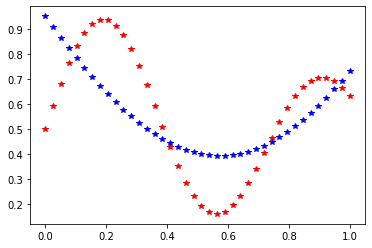

In [15]:
model.visualization(x_test, y_test)